<a href="https://colab.research.google.com/github/Dheandralf/MachineLearning/blob/main/11thWeeksTasks/LeNet_MNIST_Dheandra_1103213048.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Nama       : Mochamad Permana Ash Shidiq
* NIM        : 1103228233
* Model      : MNIST

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
# Memuat dataset MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()


In [ ]:
# Normalisasi data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255


In [ ]:
# Model LeNet
model = models.Sequential([
    layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
# Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Melatih model
history = model.fit(train_images, train_labels, epochs=10, batch_size=128,
                    validation_data=(test_images, test_labels))

Epoch 1/10
469/469 [==============================] - 24s 50ms/step - loss: 0.3292 - accuracy: 0.9024 - val_loss: 0.1070 - val_accuracy: 0.9685
Epoch 2/10
469/469 [==============================] - 20s 44ms/step - loss: 0.0958 - accuracy: 0.9711 - val_loss: 0.0665 - val_accuracy: 0.9800
Epoch 3/10
469/469 [==============================] - 24s 51ms/step - loss: 0.0703 - accuracy: 0.9783 - val_loss: 0.0527 - val_accuracy: 0.9834
Epoch 4/10
469/469 [==============================] - 21s 44ms/step - loss: 0.0559 - accuracy: 0.9825 - val_loss: 0.0448 - val_accuracy: 0.9851
Epoch 5/10
469/469 [==============================] - 23s 50ms/step - loss: 0.0461 - accuracy: 0.9853 - val_loss: 0.0417 - val_accuracy: 0.9868
Epoch 6/10
469/469 [==============================] - 20s 44ms/step - loss: 0.0394 - accuracy: 0.9876 - val_loss: 0.0469 - val_accuracy: 0.9845
Epoch 7/10
469/469 [==============================] - 22s 47ms/step - loss: 0.0343 - accuracy: 0.9889 - val_loss: 0.0406 - val_accuracy:

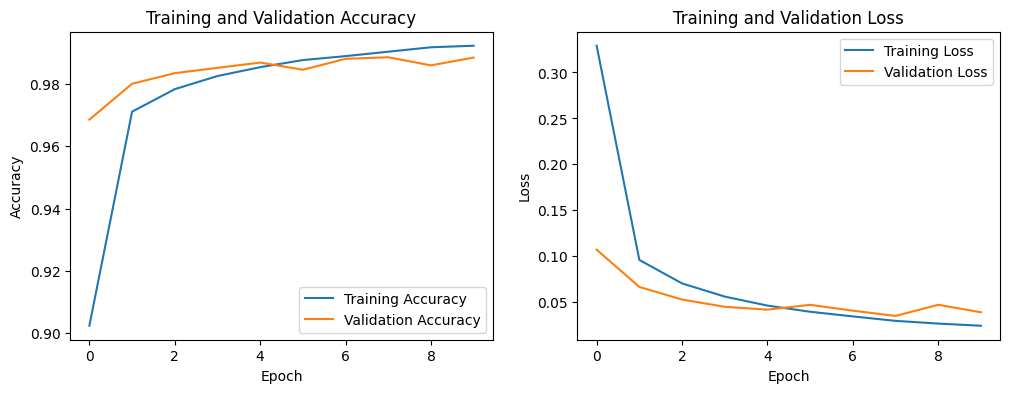

In [ ]:
# Menampilkan kurva akurasi dan loss
plt.figure(figsize=(12, 4))

# Plot kurva akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot kurva loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

313/313 [==============================] - 2s 5ms/step


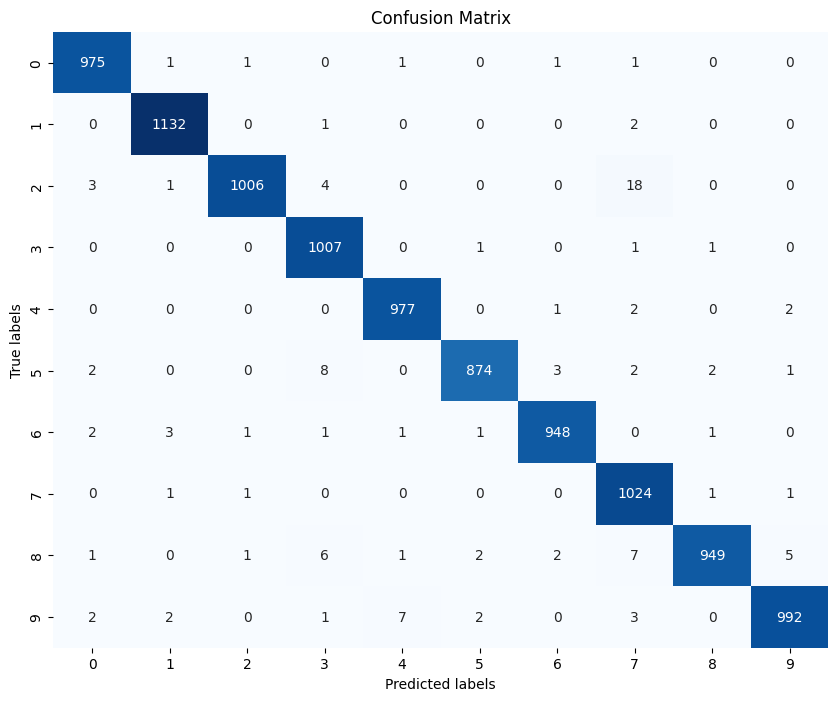

In [ ]:
# Prediksi label kelas untuk data uji
y_pred = np.argmax(model.predict(test_images), axis=-1)

# Menghitung confusion matrix
cm = confusion_matrix(test_labels, y_pred)

# Menampilkan confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()